In [21]:
import numpy as np
import pandas as pd

from graspologic.embed import AdjacencySpectralEmbed as ASE
from graspologic.simulations import sbm
from graspologic.utils import remove_vertices
from graspologic.plot import pairplot

In [22]:
P = np.array([[.8, .2], 
              [.2, .8]])
M = sbm([50, 50], P)
A, a = remove_vertices(M, indices=[0, -1], return_removed=True)

ase = ASE(n_components=2)
ase.fit(A)

fitted_latents = ase.latent_left_
predicted_latents = ase.predict(A)

### they're close but they're not on top of each other

In [41]:
np.allclose(fitted_latents, predicted_latents)

False

In [46]:
np.allclose(fitted_latents, predicted_latents, atol=1e-1)

True

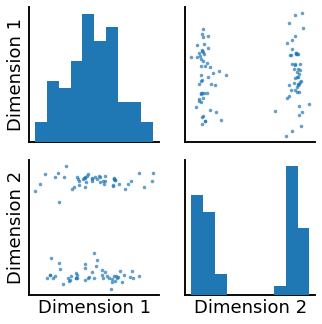

In [24]:
pairplot(fitted_latents)

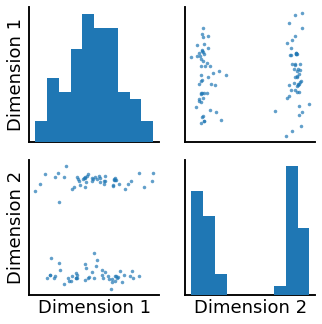

In [25]:
pairplot(predicted_latents)

In [32]:
fitted_latents_df = pd.DataFrame(fitted_latents, columns=["fit_x1", "fit_x2"])
predicted_latents_df = pd.DataFrame(predicted_latents, columns=["pred_x1", "pred_x2"])
pd.concat([fitted_latents_df, predicted_latents_df], axis='columns')

,fit_x1,fit_x2,pred_x1,pred_x2
0,0.650576,-0.565366,0.644434,-0.556851
1,0.796514,-0.569589,0.787286,-0.559061
2,0.603366,-0.552208,0.598059,-0.544459
3,0.681077,-0.469757,0.674356,-0.462361
4,0.613901,-0.569304,0.608370,-0.561120
...,...,...,...,...
93,0.650845,0.443545,0.644701,0.436865
94,0.766764,0.445165,0.758210,0.437242
95,0.706685,0.564090,0.699408,0.554822
96,0.740632,0.498801,0.732688,0.490265
